## Tabular Data Binary Classification

by: Afonso Proenca

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Generate random points (X) and random binary (0 or 1) class (y) and convert them to tabular data (.csv):

torch.Size([2000, 50])
torch.Size([2000, 1])


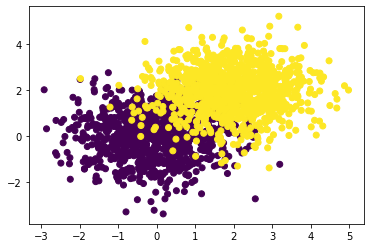

In [225]:
# Generate random data points
X1 = torch.randn(1000, 50)
X2 = torch.randn(1000, 50) + 2
X = torch.cat([X1, X2], dim=0)

# Generate random binary class [0-1]
Y1 = torch.zeros(1000, 1)
Y2 = torch.ones(1000, 1)
Y = torch.cat([Y1, Y2], dim=0)

print(X.size())
print(Y.size())

plt.scatter(X[:, 0], X[:, 1], c=Y)

In [226]:
# Create dataframe and write to disk
df = pd.DataFrame(X.numpy(),Y.numpy().reshape(len(Y)))
df.index.name = 'class'
df.to_csv('data/tabularDataBinaryClassification.csv')

# Read dataframe from disk
df = pd.read_csv("data/tabularDataBinaryClassification.csv")
df.head()

,class,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0.0,2.422780,-0.431574,0.897622,0.393878,1.086436,-0.178623,0.932814,-0.339729,1.359854,...,-0.069727,-0.401255,1.667763,-0.241370,-0.705397,1.767928,-0.730897,0.701143,0.265173,1.246941
1,0.0,1.310716,0.190686,0.861822,-0.217327,-1.523941,-1.709531,-0.742610,-0.124587,-0.862042,...,-0.875706,-1.617797,-0.266513,-1.013224,-2.246475,-0.779900,-0.103236,0.781098,0.609295,-0.137634
2,0.0,0.439718,0.531317,-0.875311,0.179403,1.349824,1.299492,1.265242,1.743042,-0.841047,...,0.057740,-1.203925,-0.169076,-0.841355,0.024399,0.572330,0.324980,0.779576,0.149897,2.023052
3,0.0,-0.240017,-0.571265,-0.315289,-0.217556,0.421886,1.124991,0.394047,-0.243082,-1.062569,...,-0.029603,-1.444830,-0.266760,-1.113325,1.058670,0.870186,0.557323,-0.797647,0.559033,0.789741
4,0.0,1.075871,-1.185878,0.400087,-1.210974,-0.233038,0.026210,-0.959455,-1.313719,3.275411,...,-0.104794,-1.909517,1.986695,0.393761,-1.115791,1.040213,0.111421,-1.822265,0.153797,-1.286340


In [227]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(50, 50)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 100)
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(100, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y

In [228]:
XN = df.to_numpy()
X = torch.Tensor(XN[:,1:])
Y = torch.Tensor(XN[:,0])

print(X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train = torch.Tensor(X_train).type(torch.FloatTensor)
Y_train = Y_train.reshape(len(Y_train),1)
Y_train = Y_train.type(torch.FloatTensor)

net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

torch.Size([2000, 50]) torch.Size([2000])


In [229]:
def train_epoch(model, opt, criterion, batch_size=50):
    model.train()
    losses = []
    for i in range(0, X.size(0), batch_size):
        x_batch = X_train[i: i + batch_size, :]
        y_batch = Y_train[i: i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

In [230]:
e_losses = []
num_epochs = 100
for e in range(num_epochs+1):
    e_losses += train_epoch(net, opt, criterion)
    if e % 10 == 0:
        print('Epoch:',e ,' Loss:', e_losses[e])

Epoch: 0  Loss: 0.697074
Epoch: 10  Loss: 0.519263
Epoch: 20  Loss: 0.36104855
Epoch: 30  Loss: 0.12579705
Epoch: 40  Loss: 0.16264614
Epoch: 50  Loss: 0.14812855
Epoch: 60  Loss: 0.074631155
Epoch: 70  Loss: 0.030001966
Epoch: 80  Loss: 0.035133615
Epoch: 90  Loss: 0.029522693
Epoch: 100  Loss: 0.013987609


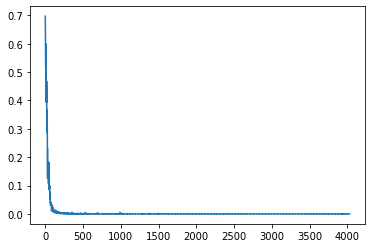

In [231]:
plt.plot(e_losses)

Loss after training: 3.476389611023478e-05
Accuracy after training: 1.0
torch.Size([400]) (400, 1)
torch.Size([400]) (400, 1)
Confusion Matrix:
[[184   0]
 [  0 216]]


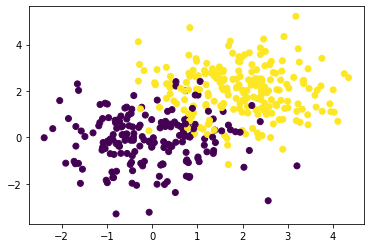

In [232]:
Y_test = Y_test.reshape(len(Y_test))
X_test = torch.Tensor(X_test).type(torch.FloatTensor)

net.eval()
Y_pred = net(X_test)
loss = criterion(Y_pred.squeeze(), Y_test)  
Y_pred = Y_pred.round().detach().numpy()
accuracy = accuracy_score(Y_pred,Y_test)

print('Loss after training:' , loss.item())
print('Accuracy after training:', accuracy)

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred)

print(Y_test.shape, Y_pred.shape)
print(Y_test.shape,Y_pred.shape)

print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))